In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 文物信息
relics_info = pd.read_excel('附件.xlsx', sheet_name='表单1')
# 已分类的文物化学成分
relics_classified_info = pd.read_excel('附件.xlsx', sheet_name='表单2')
# 未分类的文物化学成分
relics_unclassified_info = pd.read_excel('附件.xlsx', sheet_name='表单3')

In [3]:
# 找到包含至少一个缺失值的行
# 只有颜色缺失，并且按纹饰分为两类，一类纹饰A、铅钡和风化，一类纹饰B、铅钡和风化
relics_info[relics_info.isna().any(axis=1)].sort_values(by=['纹饰', '类型', '表面风化'], axis=0).reset_index(drop=True)

,文物编号,纹饰,类型,颜色,表面风化
0,19,A,铅钡,NaN,风化
1,48,A,铅钡,NaN,风化
2,40,C,铅钡,NaN,风化
3,58,C,铅钡,NaN,风化


In [4]:
# 筛选纹饰为A的文物
A_relics = relics_info.query("纹饰 == 'A' and 类型 == '铅钡' and 表面风化 == '风化'").sort_values(by=['颜色', '文物编号'], axis=0).reset_index(drop=True)
print(A_relics)
# 存放文物编号
A_relics_index = ''
for row in A_relics.itertuples():
    if row.文物编号 == 19:
        break
    # print(row.文物编号)
    A_relics_index += '^' + str(row.文物编号).zfill(2) + '|'
A_relics_index = A_relics_index[:-1]
print(A_relics_index)

    文物编号 纹饰  类型   颜色 表面风化
0      2  A  铅钡   浅蓝   风化
1     28  A  铅钡   浅蓝   风化
2     29  A  铅钡   浅蓝   风化
3     42  A  铅钡   浅蓝   风化
4     44  A  铅钡   浅蓝   风化
5     53  A  铅钡   浅蓝   风化
6     23  A  铅钡   蓝绿   风化
7     49  A  铅钡    黑   风化
8     50  A  铅钡    黑   风化
9     19  A  铅钡  NaN   风化
10    48  A  铅钡  NaN   风化
^02|^28|^29|^42|^44|^53|^23|^49|^50


In [5]:
# A 在表单2中匹配对应的文物采样点化学成分
relics_classified_info.query("文物采样点.str.contains(@A_relics_index)", engine='python').reset_index(drop=True)
# 在9件文物中有6件文物采样点未风化，所得化学成分缺乏参考性，故取众数，19和48为浅蓝色

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
1,23未风化点,53.79,7.92,NaN,0.50,0.71,1.42,NaN,2.99,16.98,11.86,NaN,0.33,NaN,NaN
2,28未风化点,68.08,NaN,0.26,1.34,1.00,4.70,0.41,0.33,17.14,4.04,1.04,0.12,0.23,NaN
3,29未风化点,63.30,0.92,0.30,2.98,1.49,14.34,0.81,0.74,12.31,2.03,0.41,0.25,NaN,NaN
4,42未风化点1,51.26,5.74,0.15,0.79,1.09,3.53,NaN,2.67,21.88,10.47,0.08,0.35,NaN,NaN
5,42未风化点2,51.33,5.68,0.35,NaN,1.16,5.66,NaN,2.72,20.12,10.88,NaN,NaN,NaN,NaN
6,44未风化点,60.74,3.06,0.20,2.14,NaN,12.69,0.77,0.43,13.61,5.22,NaN,0.26,NaN,NaN
7,49,28.79,NaN,NaN,4.58,1.47,5.38,2.74,0.70,34.18,6.10,11.10,0.46,NaN,NaN
8,49未风化点,54.61,NaN,0.30,2.08,1.20,6.50,1.27,0.45,23.02,4.19,4.32,0.30,NaN,NaN
9,50,17.98,NaN,NaN,3.19,0.47,1.87,0.33,1.13,44.00,14.20,6.34,0.66,NaN,NaN


In [6]:
# 筛选纹饰为C的文物
C_relics = relics_info.query("纹饰 == 'C' and 类型 == '铅钡' and 表面风化 == '风化'").sort_values(by=['颜色', '文物编号'], axis=0).reset_index(drop=True)
print(C_relics)
# 存放文物编号
C_relics_index = ''
for row in C_relics.itertuples():
    if row.文物编号 == 40:
        break
    # print(row.文物编号)
    C_relics_index += '^' + str(row.文物编号).zfill(2) + '|'
C_relics_index = C_relics_index[:-1]
print(C_relics_index)

    文物编号 纹饰  类型   颜色 表面风化
0     41  C  铅钡   浅绿   风化
1     11  C  铅钡   浅蓝   风化
2     25  C  铅钡   浅蓝   风化
3     43  C  铅钡   浅蓝   风化
4     51  C  铅钡   浅蓝   风化
5     52  C  铅钡   浅蓝   风化
6     54  C  铅钡   浅蓝   风化
7     34  C  铅钡   深绿   风化
8     36  C  铅钡   深绿   风化
9     38  C  铅钡   深绿   风化
10    39  C  铅钡   深绿   风化
11     8  C  铅钡    紫   风化
12    26  C  铅钡    紫   风化
13    56  C  铅钡   蓝绿   风化
14    57  C  铅钡   蓝绿   风化
15    40  C  铅钡  NaN   风化
16    58  C  铅钡  NaN   风化
^41|^11|^25|^43|^51|^52|^54|^34|^36|^38|^39|^08|^26|^56|^57


In [8]:
# C 在表单2中匹配对应的文物采样点化学成分
C_relics_info = relics_classified_info.query("文物采样点.str.contains(@C_relics_index)", engine='python').reset_index(drop=True)

info_lens = len(C_relics_info)
pd_list = []
name_list = []
out_index = 0
for i in range(info_lens):
    i = out_index
    name = C_relics_info.iloc[i].文物采样点
    name_list.append(name)
    if i + 1 == info_lens:
        pd_list.append(C_relics_info.iloc[i][1:])
        break
    for k in range(i + 1, info_lens):
        if name + '严重风化点' == C_relics_info.iloc[k].文物采样点:
            #print(name, 1)
            pd_list.append(C_relics_info.iloc[i][1:] * 1/3 + C_relics_info.iloc[k][1:] * 2/3)
            out_index = k + 1
            break
        elif '部位' in name and name[:-1] == C_relics_info.iloc[k].文物采样点[:-1]:
            #print(name, 2)
            # new_C_relics_info.append(C_relics_info.iloc[i])
            pd_list.append(C_relics_info.iloc[i][1:] * 1/2 + C_relics_info.iloc[k][1:] * 1/2)
            out_index = k + 1
            break
        else:
            pd_list.append(C_relics_info.iloc[i][1:])
            out_index += 1
            break
    # print(i)
dealt_C_relics_info = pd.concat(pd_list, axis=1, ignore_index=True).T

dealt_C_relics_info.insert(0, '文物采样点', name_list)
dealt_C_relics_info

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,08,9.786667,NaN,NaN,2.62,NaN,1.186667,NaN,5.563333,31.193333,30.823333,6.236667,0.476667,NaN,10.88
1,11,33.59,NaN,0.21,3.51,0.71,2.69,NaN,4.93,25.39,14.61,9.38,0.37,NaN,NaN
2,25未风化点,50.61,2.31,NaN,0.63,NaN,1.9,1.55,1.12,31.9,6.65,0.19,0.2,NaN,NaN
3,26,9.076667,NaN,NaN,2.486667,NaN,1.02,NaN,5.923333,29.79,34.383333,5.07,0.563333,NaN,11.286667
4,34,35.78,NaN,0.25,0.78,NaN,1.62,0.47,1.51,46.55,10.0,0.34,0.22,NaN,NaN
5,36,39.57,2.22,0.14,0.37,NaN,1.6,0.32,0.68,41.61,10.83,0.07,0.22,NaN,NaN
6,38,32.93,1.38,NaN,0.68,NaN,2.57,0.29,0.73,49.31,9.79,0.48,0.41,NaN,NaN
7,39,26.25,NaN,NaN,1.11,NaN,0.5,NaN,0.88,61.03,7.22,1.16,0.61,NaN,NaN
8,41,18.46,NaN,0.44,4.96,2.73,3.33,1.79,0.19,44.12,9.76,7.46,0.47,NaN,NaN
9,43部位1,17.055,NaN,NaN,5.82,0.92,2.83,1.075,3.43,52.3,5.275,NaN,0.555,NaN,NaN


In [18]:
# 文物40、58的化学成分信息
C_40_relics = relics_classified_info.query("文物采样点.str.contains('^40')", engine='python').reset_index(drop=True).fillna(0)
C_58_relics = relics_classified_info.query("文物采样点.str.contains('^58')", engine='python').reset_index(drop=True).fillna(0)

In [27]:
C_58_relics
dealt_C_relics_info = dealt_C_relics_info.fillna(0)
C_58_relics

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,58,30.39,0.0,0.34,3.49,0.79,3.52,0.86,3.13,39.35,7.66,8.99,0.24,0.0,0.0


In [53]:
# 保留第一列
first_col = dealt_C_relics_info.iloc[:, 0]

# 取第二列及其后的所有列并进行相减
result_sub = dealt_C_relics_info.iloc[:, 1:] - C_58_relics.iloc[0, 1:]

# 合并第一列和相减后的结果
result = pd.concat([first_col, result_sub], axis=1)
print(result.iloc[:, 1:].abs().sum(axis=1).sort_values())
result
# 58 与 52 相似，浅蓝

11    25.620000
13    25.900000
10    26.535000
8     28.130000
1     28.350000
4     31.100000
6     32.550000
5     34.790000
14    37.070000
9     41.980000
7     44.100000
12    47.293333
2     48.140000
0     73.420000
3     81.413333
dtype: float64


,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,08,-20.603333,0.0,-0.34,-0.87,-0.79,-2.333333,-0.86,2.433333,-8.156667,23.163333,-2.753333,0.236667,0.0,10.88
1,11,3.2,0.0,-0.13,0.02,-0.08,-0.83,-0.86,1.8,-13.96,6.95,0.39,0.13,0.0,0.0
2,25未风化点,20.22,2.31,-0.34,-2.86,-0.79,-1.62,0.69,-2.01,-7.45,-1.01,-8.8,-0.04,0.0,0.0
3,26,-21.313333,0.0,-0.34,-1.003333,-0.79,-2.5,-0.86,2.793333,-9.56,26.723333,-3.92,0.323333,0.0,11.286667
4,34,5.39,0.0,-0.09,-2.71,-0.79,-1.9,-0.39,-1.62,7.2,2.34,-8.65,-0.02,0.0,0.0
5,36,9.18,2.22,-0.2,-3.12,-0.79,-1.92,-0.54,-2.45,2.26,3.17,-8.92,-0.02,0.0,0.0
6,38,2.54,1.38,-0.34,-2.81,-0.79,-0.95,-0.57,-2.4,9.96,2.13,-8.51,0.17,0.0,0.0
7,39,-4.14,0.0,-0.34,-2.38,-0.79,-3.02,-0.86,-2.25,21.68,-0.44,-7.83,0.37,0.0,0.0
8,41,-11.93,0.0,0.1,1.47,1.94,-0.19,0.93,-2.94,4.77,2.1,-1.53,0.23,0.0,0.0
9,43部位1,-13.335,0.0,-0.34,2.33,0.13,-0.69,0.215,0.3,12.95,-2.385,-8.99,0.315,0.0,0.0


In [52]:
# 保留第一列
first_col = dealt_C_relics_info.iloc[:, 0]

# 取第二列及其后的所有列并进行相减
result_sub = dealt_C_relics_info.iloc[:, 1:] - C_40_relics.iloc[0, 1:]

# 合并第一列和相减后的结果
result = pd.concat([first_col, result_sub], axis=1)
print(result.iloc[:, 1:].abs().sum(axis=1).sort_values())
result

# 40 与 39相似，深绿 

7     21.810000
9     33.130000
12    38.750000
11    41.570000
6     47.300000
8     47.740000
14    50.520000
4     52.230000
10    53.625000
13    54.650000
5     63.580000
2     81.790000
1     87.460000
0     92.863333
3     97.750000
dtype: float64


,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,08,-6.923333,0.0,0.0,0.75,0.0,0.736667,-0.19,5.563333,-39.016667,24.133333,4.466667,-0.203333,0.0,10.88
1,11,16.88,0.0,0.21,1.64,0.71,2.24,-0.19,4.93,-44.82,7.92,7.61,-0.31,0.0,0.0
2,25未风化点,33.9,2.31,0.0,-1.24,0.0,1.45,1.36,1.12,-38.31,-0.04,-1.58,-0.48,0.0,0.0
3,26,-7.633333,0.0,0.0,0.616667,0.0,0.57,-0.19,5.923333,-40.42,27.693333,3.3,-0.116667,0.0,11.286667
4,34,19.07,0.0,0.25,-1.09,0.0,1.17,0.28,1.51,-23.66,3.31,-1.43,-0.46,0.0,0.0
5,36,22.86,2.22,0.14,-1.5,0.0,1.15,0.13,0.68,-28.6,4.14,-1.7,-0.46,0.0,0.0
6,38,16.22,1.38,0.0,-1.19,0.0,2.12,0.1,0.73,-20.9,3.1,-1.29,-0.27,0.0,0.0
7,39,9.54,0.0,0.0,-0.76,0.0,0.05,-0.19,0.88,-9.18,0.53,-0.61,-0.07,0.0,0.0
8,41,1.75,0.0,0.44,3.09,2.73,2.88,1.6,0.19,-26.09,3.07,5.69,-0.21,0.0,0.0
9,43部位1,0.345,0.0,0.0,3.95,0.92,2.38,0.885,3.43,-17.91,-1.415,-1.77,-0.125,0.0,0.0


In [54]:
relics_classified_info

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,01,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39
1,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
2,03部位1,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN
3,03部位2,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN
4,04,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54严重风化点,17.11,NaN,NaN,NaN,1.11,3.65,NaN,1.34,58.46,NaN,14.13,1.12,NaN,NaN
65,55,49.01,2.71,NaN,1.13,NaN,1.45,NaN,0.86,32.92,7.95,0.35,NaN,NaN,NaN
66,56,29.15,NaN,NaN,1.21,NaN,1.85,NaN,0.79,41.25,15.45,2.54,NaN,NaN,NaN
67,57,25.42,NaN,NaN,1.31,NaN,2.18,NaN,1.16,45.10,17.30,NaN,NaN,NaN,NaN


In [55]:
relics_unclassified_info

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,A1,无风化,78.45,NaN,NaN,6.08,1.86,7.23,2.15,2.11,NaN,NaN,1.06,0.03,NaN,0.51
1,A2,风化,37.75,NaN,NaN,7.63,NaN,2.33,NaN,NaN,34.30,NaN,14.27,NaN,NaN,NaN
2,A3,无风化,31.95,NaN,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,NaN,NaN
3,A4,无风化,35.47,NaN,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,NaN,NaN
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,NaN
5,A6,风化,93.17,NaN,1.35,0.64,0.21,1.52,0.27,1.73,NaN,NaN,0.21,NaN,NaN,NaN
6,A7,风化,90.83,NaN,0.98,1.12,NaN,5.06,0.24,1.17,NaN,NaN,0.13,NaN,NaN,0.11
7,A8,无风化,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26


findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC
/var/folders/x0/_fyb4bw1227f047cqg5wjm5w0000gn/T/ipykernel_6101/1105403527.py:43: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/var/folders/x0/_fyb4bw1227f047cqg5wjm5w0000gn/T/ipykernel_6101/1105403527.py:43: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/var/folders/x0/_fyb4bw1227f047cqg5wjm5w0000gn/T/ipykernel_6101/1105403527.py:43: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/var/folders/x0/_fyb4bw1227f047cqg

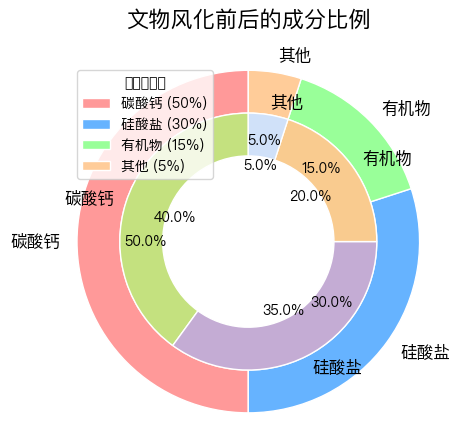

In [11]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 指定字体的完整路径
font_path = "/System/Library/Fonts/PingFang.ttc"  # 请根据实际情况调整此路径
my_font = FontProperties(fname=font_path)

# 数据
components_before = [50, 30, 15, 5]
labels_before = ['碳酸钙', '硅酸盐', '有机物', '其他']
colors_before = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

components_after = [40, 35, 20, 5]
labels_after = ['碳酸钙', '硅酸盐', '有机物', '其他']
colors_after = ['#c4e17f', '#c4acd4', '#f9cb8f', '#d0e1f9']

# 初始化图形和轴
fig, ax = plt.subplots()

# 外圈（风化前）
wedges1, texts1, autotexts1 = ax.pie(components_before, labels=labels_before, autopct='%1.1f%%', startangle=90, 
                                      textprops={'fontproperties': my_font}, radius=1.2, colors=colors_before, wedgeprops=dict(width=0.3, edgecolor='w'))

# 内圈（风化后）
wedges2, texts2, autotexts2 = ax.pie(components_after, labels=labels_after, autopct='%1.1f%%', startangle=90, 
                                      textprops={'fontproperties': my_font}, radius=0.9, colors=colors_after, wedgeprops=dict(width=0.3, edgecolor='w'))

# 提高标签和百分比文本的可读性
for text in texts1 + texts2:
    text.set_fontproperties(my_font)
    text.set_size(12)
for autotext in autotexts1 + autotexts2:
    autotext.set_size(10)

# 标题
plt.title('文物风化前后的成分比例', y=1.08, fontproperties=my_font, fontsize=16)

# 图例
legend_labels = [f"{label} ({comp}%)" for label, comp in zip(labels_before, components_before)]
plt.legend(wedges1, legend_labels, title="成分和比例", loc="best", prop=my_font, title_fontsize=10)

# 调整布局以适应标题和图例
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 显示图形
plt.show()

In [14]:
import pyecharts.options as opts
from pyecharts.charts import Pie

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://echarts.apache.org/examples/editor.html?c=pie-nest

目前无法实现的功能:

1、暂无
"""

inner_x_data = ["直达", "营销广告", "搜索引擎"]
inner_y_data = [335, 679, 1548]
inner_data_pair = [list(z) for z in zip(inner_x_data, inner_y_data)]

outer_x_data = ["直达", "营销广告", "搜索引擎", "邮件营销", "联盟广告", "视频广告", "百度", "谷歌", "必应", "其他"]
outer_y_data = [335, 310, 234, 135, 1048, 251, 147, 102]
outer_data_pair = [list(z) for z in zip(outer_x_data, outer_y_data)]

(
    Pie()
    .add(
        series_name="访问来源",
        data_pair=inner_data_pair,
        radius=[0, "30%"],
        label_opts=opts.LabelOpts(position="inner"),
    )
    .add(
        series_name="访问来源",
        radius=["40%", "55%"],
        data_pair=outer_data_pair,
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
            background_color="#eee",
            border_color="#aaa",
            border_width=1,
            border_radius=4,
            rich={
                "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                "per": {
                    "color": "#eee",
                    "backgroundColor": "#334455",
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        ),
    )
    .set_global_opts(legend_opts=opts.LegendOpts(pos_left="left", orient="vertical"))
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"
        )
    )
    .render("nested_pies.html")
)


'/Users/koschei/Project/MathModel/CUMCM/nested_pies.html'